In [1]:
from sklearn.ensemble import BaggingClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
iris=datasets.load_iris()
X=iris.data
y=iris.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=0)

In [4]:
len(X_test)

45

貝式定理

https://ithelp.ithome.com.tw/articles/10205582?sc=iThelpR

https://mropengate.blogspot.com/2015/06/ai-ch14-3-naive-bayes-classifier.html

https://fu-sheng-wang.blogspot.com/2017/03/ai231-naive-bayes-classifier.html

In [5]:
from sklearn import tree
from sklearn import svm
from sklearn.naive_bayes import GaussianNB

In [6]:
clf=tree.DecisionTreeClassifier()
# clf=svm.LinearSVC()
# clf=GaussianNB()

In [7]:
bagging=BaggingClassifier(estimator=clf,n_estimators=10,
                          bootstrap=True,bootstrap_features=True,max_features=3,max_samples=0.7)

In [8]:
bagging.fit(X_train,y_train)

BaggingClassifier(bootstrap_features=True, estimator=DecisionTreeClassifier(),
                  max_features=3, max_samples=0.7)

In [9]:
bagging.predict(X_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [10]:
bagging.score(X_train,y_train)

0.9904761904761905

In [11]:
bagging.score(X_test,y_test)

0.9555555555555556

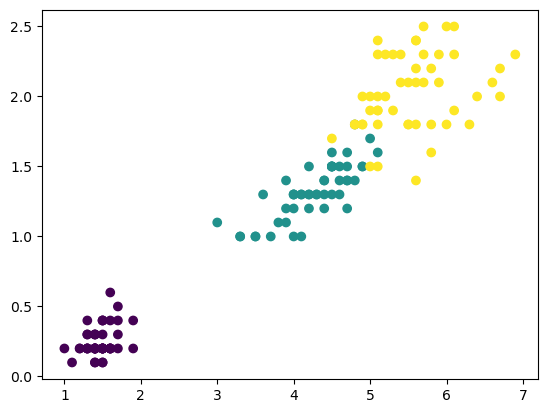

In [12]:
plt.scatter(X[:,2],X[:,3],c=y)

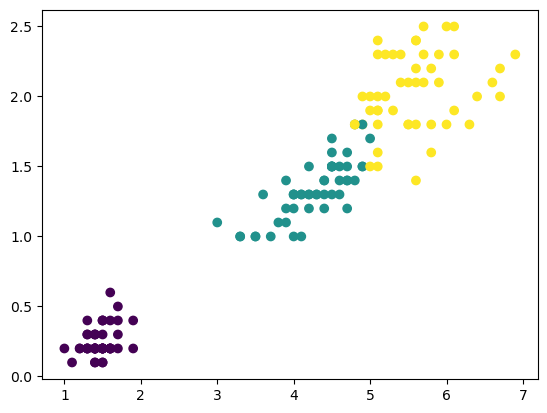

In [13]:
plt.scatter(X[:,2],X[:,3],c=bagging.predict(X))

Decision Tree:
Train accuracy: 0.9904761904761905
Test accuracy: 0.9777777777777777

SVM:
Train accuracy: 0.9428571428571428
Test accuracy: 0.9111111111111111

Naive Bayes:
Train accuracy: 0.9428571428571428
Test accuracy: 0.9555555555555556


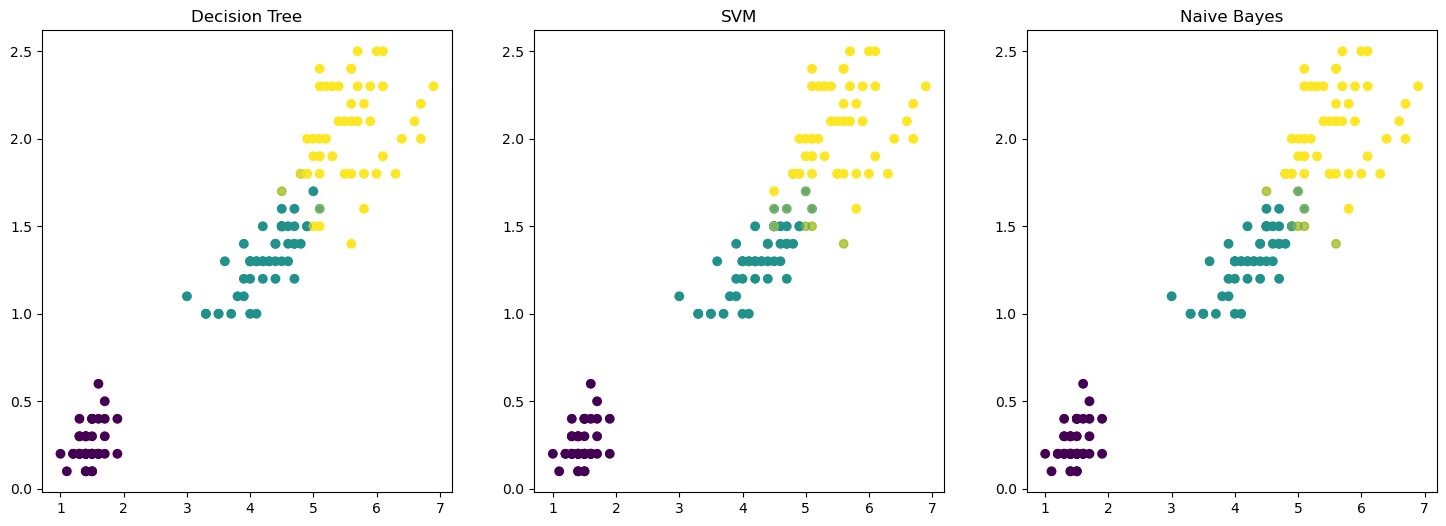

In [14]:
from sklearn import tree
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# 加載數據集
iris = datasets.load_iris()
X = iris.data
y = iris.target

# 分割數據集為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 定義分類器
clf_tree = tree.DecisionTreeClassifier()
clf_svm = svm.LinearSVC(dual='auto', max_iter=10000)  # 設置 dual='auto' 並增加 max_iter
clf_nb = GaussianNB()

# 定義 BaggingClassifier
bagging_tree = BaggingClassifier(estimator=clf_tree, n_estimators=10,
                                 bootstrap=True, bootstrap_features=True, max_features=3, max_samples=0.7)
bagging_svm = BaggingClassifier(estimator=clf_svm, n_estimators=10,
                                bootstrap=True, bootstrap_features=True, max_features=3, max_samples=0.7)
bagging_nb = BaggingClassifier(estimator=clf_nb, n_estimators=10,
                               bootstrap=True, bootstrap_features=True, max_features=3, max_samples=0.7)

# 訓練 Bagging 模型
bagging_tree.fit(X_train, y_train)
bagging_svm.fit(X_train, y_train)
bagging_nb.fit(X_train, y_train)

# 預測並計算準確率
# Decision Tree
print("Decision Tree:")
print("Train accuracy:", bagging_tree.score(X_train, y_train))
print("Test accuracy:", bagging_tree.score(X_test, y_test))

# SVM
print("\nSVM:")
print("Train accuracy:", bagging_svm.score(X_train, y_train))
print("Test accuracy:", bagging_svm.score(X_test, y_test))

# Naive Bayes
print("\nNaive Bayes:")
print("Train accuracy:", bagging_nb.score(X_train, y_train))
print("Test accuracy:", bagging_nb.score(X_test, y_test))

# 繪製結果
plt.figure(figsize=(18, 6))

# Decision Tree
plt.subplot(1, 3, 1)
plt.scatter(X[:, 2], X[:, 3], c=y)
plt.scatter(X[:, 2], X[:, 3], c=bagging_tree.predict(X), alpha=0.3)
plt.title("Decision Tree")

# SVM
plt.subplot(1, 3, 2)
plt.scatter(X[:, 2], X[:, 3], c=y)
plt.scatter(X[:, 2], X[:, 3], c=bagging_svm.predict(X), alpha=0.3)
plt.title("SVM")

# Naive Bayes
plt.subplot(1, 3, 3)
plt.scatter(X[:, 2], X[:, 3], c=y)
plt.scatter(X[:, 2], X[:, 3], c=bagging_nb.predict(X), alpha=0.3)
plt.title("Naive Bayes")

plt.show()